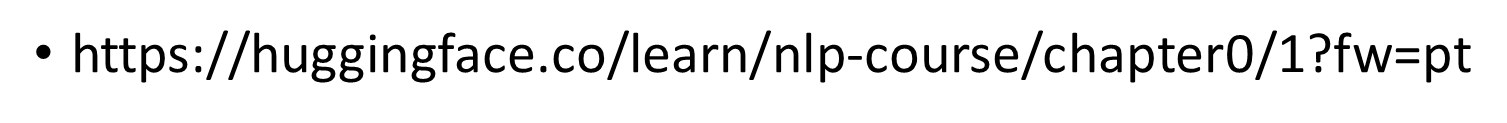

This course will teach you about natural language processing (NLP) using libraries from the Hugging Face ecosystem — 🤗 Transformers, 🤗 Datasets, 🤗 Tokenizers, and 🤗 Accelerate — as well as the Hugging Face Hub.

The 🤗 Transformers library provides the functionality to create and use those shared models. The Model Hub contains thousands of pretrained models that anyone can download and use. You can also upload your own models to the Hub!

As we dive into Transformer models in this course, you’ll see mentions of architectures and checkpoints as well as models. These terms all have slightly different meanings:

**Architecture**: This is the skeleton of the model — the definition of each layer and each operation that happens within the model.
**Checkpoints**: These are the weights that will be loaded in a given architecture.
**Model**: This is an umbrella term that isn’t as precise as “architecture” or “checkpoint”: it can mean both. This course will specify architecture or checkpoint when it matters to reduce ambiguity.

For example, **BERT** is an architecture while **bert-base-cased**, a set of weights trained by the Google team for the first release of BERT, is a **checkpoint**. However, one can say “the BERT model” and “the bert-base-cased model.”

# pipeline()

The most basic object in the 🤗 Transformers library is the pipeline() function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer:

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I am so happy  ")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9998812675476074}]

In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="1231czx/llama3_it_ultra_list_and_bold500")
pipe("I am so happy  ")

config.json:   0%|          | 0.00/854 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions")
pipe("I am so sad ")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'sadness', 'score': 0.9125896692276001}]

We can even pass several sentences!


In [ ]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

There are three main steps involved when you pass some text to a pipeline:

1. The text is preprocessed into a format the model can understand.
2. The preprocessed inputs are passed to the model.
3. The predictions of the model are post-processed, so you can make sense of them.

## Some of the currently available pipelines are:

1. feature-extraction (get the vector representation of a text)
2. fill-mask
3. ner (named entity recognition)
4. question-answering
5. sentiment-analysis
6. summarization
7. text-generation
8. translation
9. zero-shot-classification

https://huggingface.co/docs/transformers/main_classes/pipelines


# Zero-shot classification

 we need to classify texts that haven’t been labelled. This is a common scenario in real-world projects because annotating text is usually time-consuming and requires domain expertise. For this use case, the zero-shot-classification pipeline is very powerful: it allows you to specify which labels to use for the classification, so you don’t have to rely on the labels of the pretrained model. You’ve already seen how the model can classify a sentence as positive or negative using those two labels — but it can also classify the text using any other set of labels you like.

In [3]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "I start to learn python",
    candidate_labels=["education","politics","sports"],

)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'sequence': 'I start to learn python',
 'labels': ['education', 'sports', 'politics'],
 'scores': [0.9592640995979309, 0.024455804377794266, 0.01628010720014572]}

This pipeline is called zero-shot because you don’t need to fine-tune the model on your data to use it. It can directly return probability scores for any list of labels you want!

# Text generation

The main idea here is that you provide a prompt and the model will auto-complete it by generating the remaining text.

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to design and implement an easy-to-use, and functional, web app, which will allow you to quickly build your application with the ease of a human.\n\nFrom there, through the introduction'}]

You can control how many different sequences are generated with the argument num_return_sequences and the total length of the output text with the argument max_length

In [ ]:
generator("In this course, we will teach you how to",num_return_sequences=10,max_length=30)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to do everything you can do in order to achieve your desired results.\n\nWhat is Good Morning?'},
 {'generated_text': 'In this course, we will teach you how to create an application using React.\n\nWhy does React work with ReactJS?\n\nRever'},
 {'generated_text': 'In this course, we will teach you how to use the AO3 for complex math problems.\n\nWe will begin from Basic to Advanced ('},
 {'generated_text': 'In this course, we will teach you how to make your voice count as high as the tone of your voice to your desired volume.\n\n\nThis'},
 {'generated_text': 'In this course, we will teach you how to develop the best web pages with HTML5, CSS3, and HTML6. The course will be'},
 {'generated_text': 'In this course, we will teach you how to get your hands dirty on how to properly use a condom.\n\nThe purpose of this course was'},
 {'generated_text': 'In this course, we will teach you how to write good programs, including: Haskell, 

# Using any model from the Hub in a pipeline

The previous examples used the default model for the task at hand, but you can also choose a **particular model** from the **Hub** to use in a pipeline for a specific task — say, text generation. Go to the Model Hub and click on the corresponding tag on the left to display only the supported models for that task.

Let’s try the **distilgpt2 model**! Here’s how to load it in the same pipeline as before:



In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="facebook/opt-125m")
generator(
    "In this course, we will teach you how to"
)

[{'generated_text': 'In this course, we will teach you how to use the new and improved version of the Windows'}]

You can refine your search for a model by clicking on the language tags, and pick a model that will generate text in another language. The Model Hub even contains checkpoints for multilingual models that support several languages.

Once you select a model by clicking on it, you’ll see that there is a widget enabling you to try it directly online. This way you can quickly test the model’s capabilities before downloading it.

https://huggingface.co/spaces/CohereForAI/aya-23-35b

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="akhooli/gpt2-small-arabic")

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/510M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/30.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.55M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
prompt = "جمهورية مصر العربية "

In [ ]:
pipe(prompt)

[{'generated_text': 'جمهورية مصر العربية افقه منذ إنشائها عام 1975 م، حيث تم تقسيم السلطة الفعلية إلى مجلسين وهم رئيس مجلس الإدارة، وعضوية كل من رئيس مجلس الشورى، ورئاسة الوزراء، ثم رئيس مجلس الإدارة الذي يتم انتخاب أعضائه بحكم مناصبهم. وقد بدأ أعضاء'}]

# Mask filling

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'score': 0.19198493659496307,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.04209216684103012,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

The top_k argument controls how many possibilities you want to be displayed. Note that here the model fills in the special <mask> word, which is often referred to as a mask token. Other mask-filling models might have different mask tokens, so it’s always good to verify the proper mask word when exploring other models. One way to check it is by looking at the mask word used in the widget.

# Named entity recognition

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': 0.9981694,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9796019,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9932106,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

We pass the option grouped_entities=True in the pipeline creation function to tell the pipeline to regroup together the parts of the sentence that correspond to the same entity

In [ ]:
ner = pipeline("ner", grouped_entities=False)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-p

[{'entity': 'I-PER',
  'score': 0.99938285,
  'index': 4,
  'word': 'S',
  'start': 11,
  'end': 12},
 {'entity': 'I-PER',
  'score': 0.99815494,
  'index': 5,
  'word': '##yl',
  'start': 12,
  'end': 14},
 {'entity': 'I-PER',
  'score': 0.99590707,
  'index': 6,
  'word': '##va',
  'start': 14,
  'end': 16},
 {'entity': 'I-PER',
  'score': 0.99923277,
  'index': 7,
  'word': '##in',
  'start': 16,
  'end': 18},
 {'entity': 'I-ORG',
  'score': 0.9738931,
  'index': 12,
  'word': 'Hu',
  'start': 33,
  'end': 35},
 {'entity': 'I-ORG',
  'score': 0.976115,
  'index': 13,
  'word': '##gging',
  'start': 35,
  'end': 40},
 {'entity': 'I-ORG',
  'score': 0.9887976,
  'index': 14,
  'word': 'Face',
  'start': 41,
  'end': 45},
 {'entity': 'I-LOC',
  'score': 0.9932106,
  'index': 16,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

# POS

In [ ]:
from transformers import pipeline

# Load the pipeline for token classification, using a model fine-tuned for POS tagging
nlp = pipeline("token-classification", model="vblagoje/bert-english-uncased-finetuned-pos")

# Sample text for POS tagging
text = "Hugging Face is creating amazing tools for the NLP community."

# Get the POS tags
pos_tags = nlp(text)

# Print the results
for tag in pos_tags:
    print(f"Word: {tag['word']}, POS: {tag['entity']}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at vblagoje/bert-english-uncased-finetuned-pos were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Word: hugging, POS: VERB
Word: face, POS: NOUN
Word: is, POS: AUX
Word: creating, POS: VERB
Word: amazing, POS: ADJ
Word: tools, POS: NOUN
Word: for, POS: ADP
Word: the, POS: DET
Word: nl, POS: PROPN
Word: ##p, POS: NOUN
Word: community, POS: NOUN
Word: ., POS: PUNCT


# Question answering

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.6949766278266907, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

# Summarization

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

[{'summary_text': ' The number of engineering graduates in the United States has declined in recent years . China and India graduate six and eight times as many traditional engineers as the U.S. does . Rapidly developing economies such as China continue to encourage and advance the teaching of engineering . There are declining offerings in engineering subjects dealing with infrastructure, infrastructure, the environment, and related issues .'}]

Like with text generation, you can specify a **max_length** or a **min_length** for the result.

# Translation

For translation, you can use a default model if you provide a language pair in the task name (such as "translation_en_to_fr"), but the easiest way is to pick the model you want to use on the Model Hub.

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-mul-en")
translator("Ce cours est produit par Hugging Face.")

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/310M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/707k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/791k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.42M [00:00<?, ?B/s]

[{'translation_text': 'This course is produced by Hugging Face.'}]

In [ ]:
translator("اهلا بك فى مصر")

[{'translation_text': "Hey, you're in Egypt."}]

Like with text generation and summarization, you can specify a **max_length** or a **min_length** for the result.

The pipelines shown so far are mostly for demonstrative purposes. They were programmed for specific tasks and cannot perform variations of them. In the next Section, you’ll learn what’s inside a pipeline() function and how to **customize** its behavior.

In [ ]:
from transformers import pipeline

pipe = pipeline("translation", model="facebook/nllb-200-distilled-600M")
pipe("Hello, how are you?",src_lang="en",tgt_lang="ar")

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'translation_text': 'ar, como estás?'}]

# Image Classification

For image classification using Hugging Face's transformers library, you can use a pre-trained vision model such as ViT (Vision Transformer). The Hugging Face library includes models like google/vit-base-patch16-224, which are trained on large image datasets like ImageNet and can classify images into predefined categories.

In [ ]:
'''pip install transformers
pip install torch
pip install pillow'''


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Prediction 1: Chihuahua with score 0.6992
Prediction 2: toy terrier with score 0.0474
Prediction 3: kelpie with score 0.0389
Prediction 4: dingo, warrigal, warragal, Canis dingo with score 0.0264
Prediction 5: Norwich terrier with score 0.0206


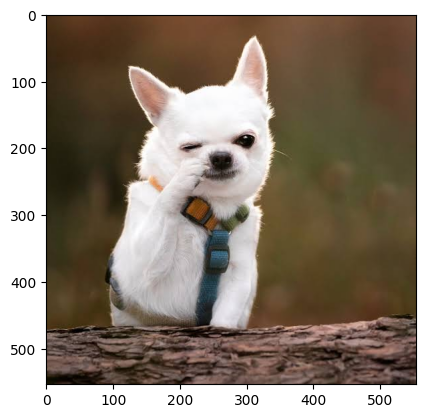

In [ ]:
from transformers import pipeline
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load the image classification pipeline with a pre-trained ViT model
classifier = pipeline("image-classification", model="google/vit-base-patch16-224")

# Image URL
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwyXeKDN29AmZgZPLS7n0Bepe8QmVappBwZCeA3XWEbWNdiDFB"  # Replace with the actual URL of your image


# Download the image from the web
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
plt.imshow(image)
# Perform image classification
predictions = classifier(image)

# Print the results
for idx, pred in enumerate(predictions):
    print(f"Prediction {idx + 1}: {pred['label']} with score {pred['score']:.4f}")



Prediction 1: candle, taper, wax light with score 0.2521
Prediction 2: vase with score 0.0334
Prediction 3: hip, rose hip, rosehip with score 0.0246
Prediction 4: table lamp with score 0.0201
Prediction 5: spotlight, spot with score 0.0103


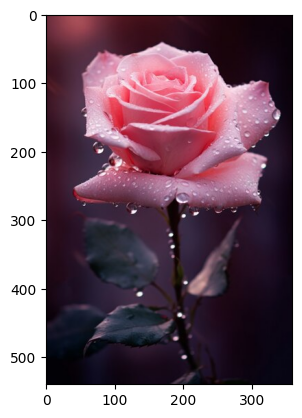

In [ ]:

image_url = "https://img.freepik.com/free-photo/beautiful-rose-studio_23-2150737305.jpg?t=st=1726735888~exp=1726739488~hmac=6fa18ea30827429acfc86d26d9cfbe3917150842a81ec64c1e70c7a82e7d9dd8&w=360"


# Download the image from the web
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
plt.imshow(image)
# Perform image classification
predictions = classifier(image)

# Print the results
for idx, pred in enumerate(predictions):
    print(f"Prediction {idx + 1}: {pred['label']} with score {pred['score']:.4f}")

# Audio ASR

To transcribe audio using Hugging Face, you can use the pipeline for automatic speech recognition (ASR) with a pre-trained model like Wav2Vec2. The ASR pipeline can transcribe audio files (e.g., .wav) into text.

In [ ]:
pip install  torchaudio


In [ ]:
import requests
from io import BytesIO
import torchaudio
from transformers import pipeline

# Load the ASR pipeline
asr = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-large-960h")

# URL of the audio file
audio_url = "https://www.signalogic.com/melp/EngSamples/Orig/male.wav"  # Replace with the actual URL  https://www.signalogic.com/index.pl?page=speech_codec_wav_samples

# Perform speech recognition
transcription = asr(audio_url)

# Print the transcription
print("Transcription:", transcription['text'])


Some weights of the model checkpoint at facebook/wav2vec2-large-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You s

Transcription: BUT WHAT IF SOMEBODY DECIDES TO BREAK IT BE CAREFUL THAT YOU KEEP ADEQUATECOVERAGE BUT LOOK FOR PLACES TO SAVE MONEY MAYBE IT'S TAKING LONGER TO GET THINGS SQUARED AWAY THAN THE BANKERS EXPECTED TIRING THE WIFE FOR ONE'S COMPANY MAY WIN HER TAXATED RETIREMENT IN COME THE BOOST IS HELPFUL BUT INADEQUATE NEW SELF DECEIVING RAGS ARE HURRIEDLY TOSSED ON THE TWO NAKED BONES WHAT A DISCUSSION CAN ENSUE WHEN THE TITLE OF THIS TYPE OF SONG IS IN QUESTION THERE IS NO DYING OR WAXING OR GASLI NEEDED PAPER WEIGHT MAY BE PERSONALIZED ON BACK WHILE CLAY IS LEATHER HARD PLACE WORK ON A FLAT SURFACE AND SMOOTH OUT THE SIMPLEST KIND OF SEPARATE SYSTEM USES A SINGLE SELF CONTAINED UNIT THE OLD SHOP ATTAGE STILL HOLDS A GOOD MECHANIC IS USUALLY A BAD BOSS OTH FIGURES WOULD GO HARRING IN LATE A YEARS SOME MAKE BEAUTIFUL CHAIRS CABINETS CHESTS DOW HOUSES ET CETERA


# generate an image

https://huggingface.co/tasks/text-to-image

In [ ]:
pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 46.8 MB/s eta 0:00:00


In [ ]:
import torch

In [ ]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "stabilityai/stable-diffusion-2"
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda") #if you have an NVIDIA GPU

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]
image.show()

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

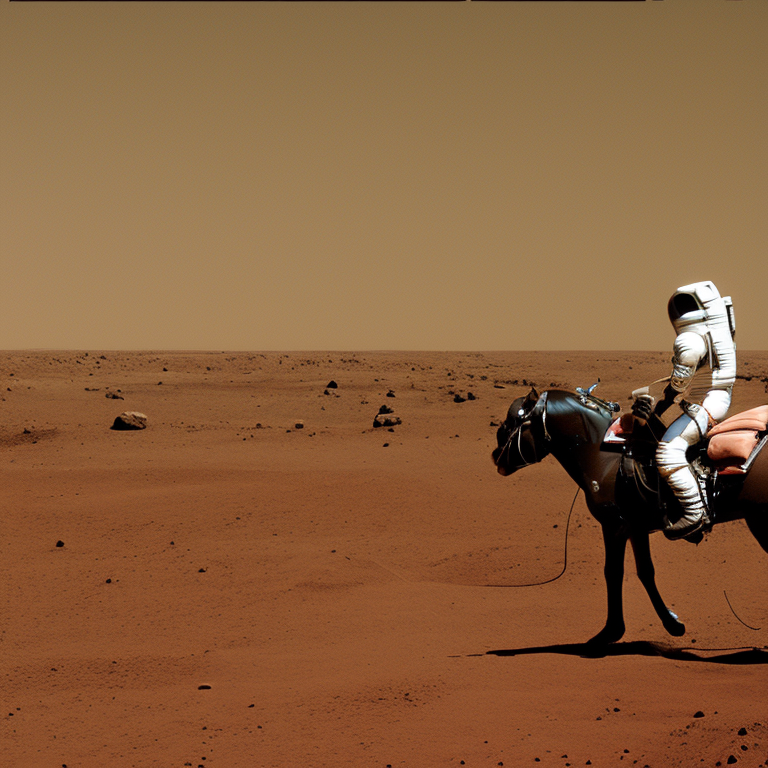

In [ ]:
image

# Limitation: Bias

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


['carpenter', 'lawyer', 'farmer', 'businessman', 'doctor']
['nurse', 'maid', 'teacher', 'waitress', 'prostitute']
